In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [7]:
animal_df = keras.preprocessing.image_dataset_from_directory(
    './Animal Image Dataset-Cats, Dogs, and Foxes',
    shuffle=True,
    image_size=(224,224),
)

Found 308 files belonging to 3 classes.


In [9]:
classes = animal_df.class_names
classes

['cat', 'dog', 'fox']

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base

In [13]:
len(animal_df)

10

In [15]:
train_size=int(len(animal_df)*0.7)
test_size = int(len(animal_df)*0.1)
val_size = int(len(animal_df)*0.2)
print(train_size, test_size, val_size)

7 1 2


In [17]:
train = animal_df.take(train_size)
val = animal_df.skip(train_size).take(val_size)
test = animal_df.skip(train_size + val_size).take(test_size)
print(train)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [21]:
model = models.Sequential([
    layers.Input(shape=(224,224, 3)),
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,969,987 (285.99 MB)

 Trainable params: 51,382,275 (196.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train,
    epochs=10,
    validation_data=val
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.4480 - loss: 67.6122 - val_accuracy: 0.8906 - val_loss: 5.8358
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.8379 - loss: 7.0309 - val_accuracy: 0.9219 - val_loss: 4.0328
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.9580 - loss: 0.8376 - val_accuracy: 0.9531 - val_loss: 2.4195
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 8s/step - accuracy: 0.9741 - loss: 0.5240 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.9845 - loss: 0.1687 - val_accuracy: 0.9844 - val_loss: 0.0197
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step - accuracy: 0.9884 - loss: 0.1469 - val_accuracy: 1.0000 - val_loss: 2.0126e-04
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - accuracy: 0.9952 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 55s 8s/step - accuracy: 1.0000 - loss: 1.3551e-05 - val_accuracy: 1.0000 - val_los

In [27]:
score = model.evaluate(test)
score

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

### finetune

In [32]:
base_model.trainable = True  # Unfreeze the base model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

fine_tune_history = model.fit(
    train,
    epochs=10,
    validation_data=val)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 143s 14s/step - accuracy: 0.9838 - loss: 0.3311 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 100s 14s/step - accuracy: 0.9891 - loss: 0.0802 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 101s 14s/step - accuracy: 0.9853 - loss: 0.0727 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 106s 15s/step - accuracy: 0.9989 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 100s 14s/step - accuracy: 1.0000 - loss: 1.4635e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 99s 14s/step - accuracy: 0.9952 - loss: 0.0254 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 100s 14s/step - accuracy: 1.0000 - loss: 1.2934e-07 - val_accuracy: 1.0000 - val_loss: 1.4939e-05
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 100s 14s/step - accuracy: 0.9893 - loss: 0.0178

In [36]:
score = model.evaluate(test)
score

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

[]

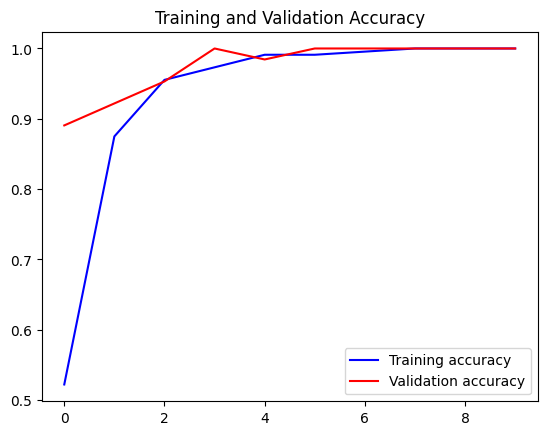

In [38]:
plt.plot( history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.plot()

[]

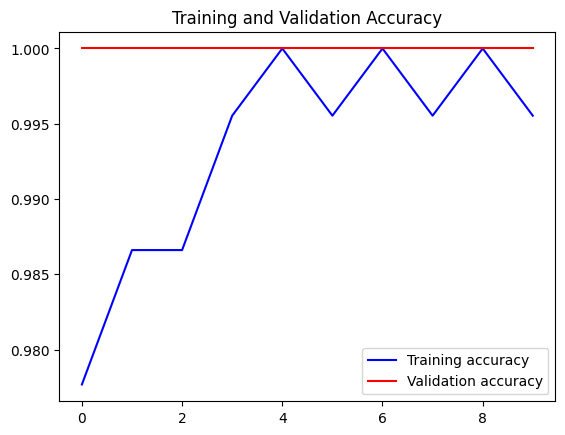

In [40]:
plt.plot( fine_tune_history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.plot()

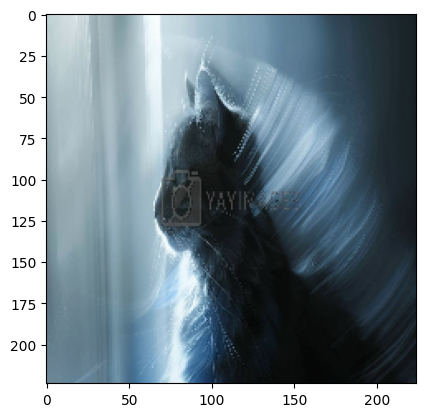

In [56]:
image = cv2.imread("./img2.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
resize = tf.image.resize(image, (224,224)) 
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [58]:
prediction = model.predict(np.expand_dims(resize, 0))
animals = ['cat', 'dog', 'fox']
print(prediction)
prediction_idx = np.argmax(prediction, axis=1)[0]
animal = animals[prediction_idx]
print(animal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[[9.9999464e-01 5.3921553e-06 0.0000000e+00]]
cat
